In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance_modified.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  84
writing score                  82
dtype: int64

In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [7]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [10]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [11]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [12]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [13]:
df['math score'].value_counts()

65     35
?      35
62     33
59     31
69     29
       ..
-89     1
334     1
33      1
113     1
0       1
Name: math score, Length: 85, dtype: int64

here as we can see ? is misleading in math score column it is equivalent to np.nan value

In [14]:
df[df['math score'] == '?']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0
434,male,group C,some high school,standard,none,?,66.0,66.0
435,male,group C,some college,free/reduced,completed,?,48.0,53.0
436,male,group D,associate's degree,standard,none,?,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,?,66.0,73.0
438,male,group C,high school,standard,none,?,56.0,51.0
439,male,group D,some high school,standard,completed,?,88.0,82.0
440,female,group C,some college,standard,completed,?,81.0,79.0
441,female,group D,high school,standard,none,?,81.0,80.0


In [15]:
df['math score'].isnull().sum()

8

In [16]:
# change value of '?' to NaN
df['math score'] = df['math score'].replace('?', np.nan)

In [17]:
df['math score'].value_counts()

65     35
62     33
59     31
69     29
68     26
       ..
-89     1
334     1
33      1
113     1
0       1
Name: math score, Length: 84, dtype: int64

no we can see the nan value count is updated

In [18]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [19]:
df['math score'] = df['math score'].astype('float64')

In [20]:
df = df.reset_index()

In [21]:
df

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,998,female,group D,some college,standard,completed,68.0,78.0,77.0


<AxesSubplot:title={'center':'scatterplot Math Score before imputation'}, xlabel='index', ylabel='math score'>

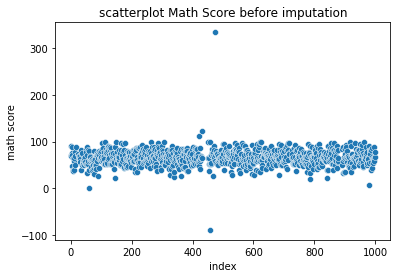

In [22]:
plt.title('scatterplot Math Score before imputation')
sns.scatterplot(x='index' , y='math score', data=df)

<AxesSubplot:title={'center':'Scatterplot of Math Score before removing missing values and outliers'}, xlabel='index', ylabel='reading score'>

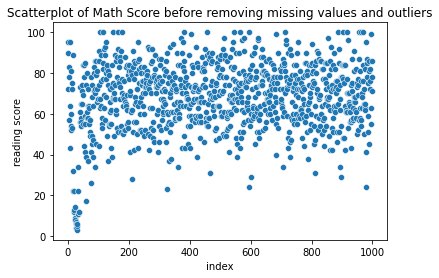

In [23]:
plt.title('Scatterplot of Math Score before removing missing values and outliers')
sns.scatterplot(x='index' , y='reading score', data=df)

<AxesSubplot:title={'center':'Scatterplot of writing score before outlier removal'}, xlabel='index', ylabel='writing score'>

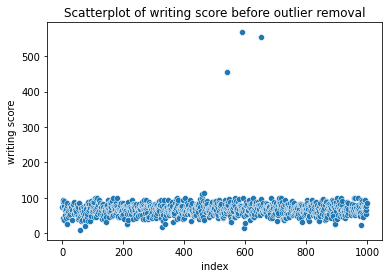

In [24]:
plt.title('Scatterplot of writing score before outlier removal')
sns.scatterplot(x='index' , y='writing score', data=df)

<AxesSubplot:>

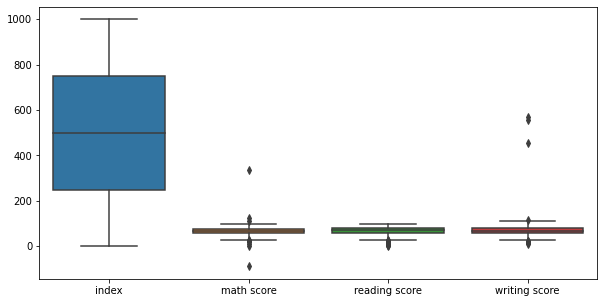

In [25]:
#box plot for math score
plt.figure(figsize=(10,5))
sns.boxplot( data=df)

In [26]:
df.describe()

,index,math score,reading score,writing score
count,1000.000000,957.000000,994.000000,991.000000
mean,499.500000,66.323929,68.008048,69.487386
std,288.819436,18.280119,16.602270,29.563757
min,0.000000,-89.000000,3.000000,10.000000
25%,249.750000,57.000000,58.000000,57.000000
50%,499.500000,66.000000,69.500000,69.000000
75%,749.250000,77.000000,79.000000,79.000000
max,999.000000,334.000000,100.000000,567.000000


In [27]:
df.isnull().sum()

index                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

refer --
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

<AxesSubplot:>

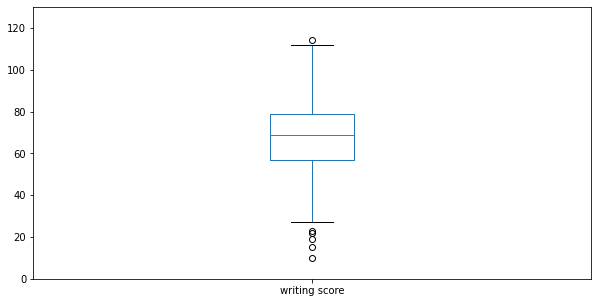

In [28]:
# box plot for math score
plt.figure(figsize=(10,5))
plt.ylim(0,130)
df['writing score'].plot.box()   

<AxesSubplot:>

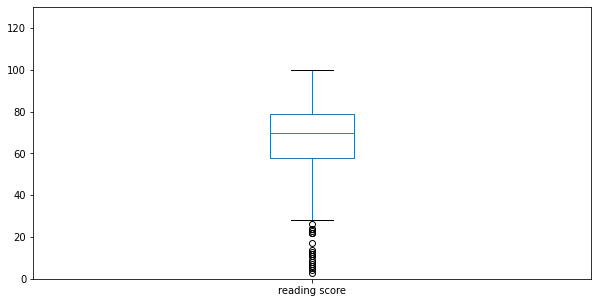

In [29]:
plt.figure(figsize=(10,5))
plt.ylim(0,130)
df['reading score'].plot.box()

<AxesSubplot:>

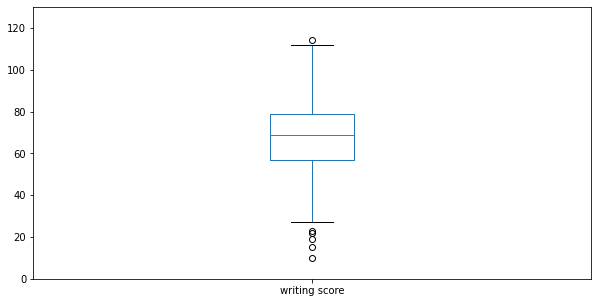

In [30]:
plt.figure(figsize=(10,5))
plt.ylim(0,130)
df['writing score'].plot.box()

In [31]:
##3 outlier detection
# for math score upper threshold is 100  lower one is 27
# for reading score upper threshold is 100  lower one is 28
# for writing score upper threshold is 112  lower one is 27

this method is time consuming rather we will make a function and apply it to every column to remove outlier

In [32]:
# Importing
import sklearn
import pandas as pd

<AxesSubplot:xlabel='math score', ylabel='Count'>

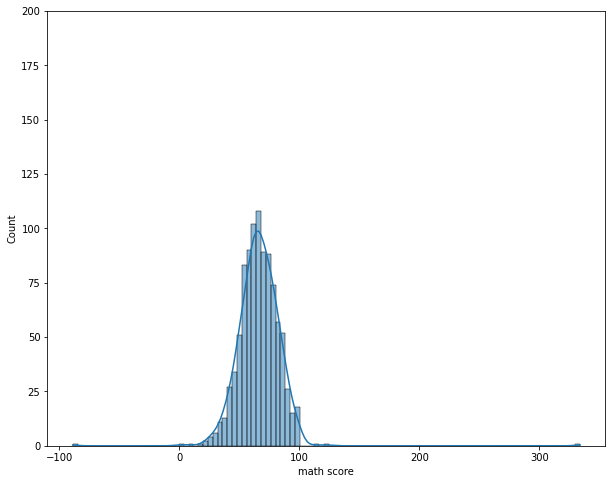

In [33]:
# plot normal distribution for math score
plt.figure(figsize=(10,8))
plt.ylim(0,200)
sns.histplot(df['math score'],kde  =True)


<AxesSubplot:xlabel='reading score', ylabel='Count'>

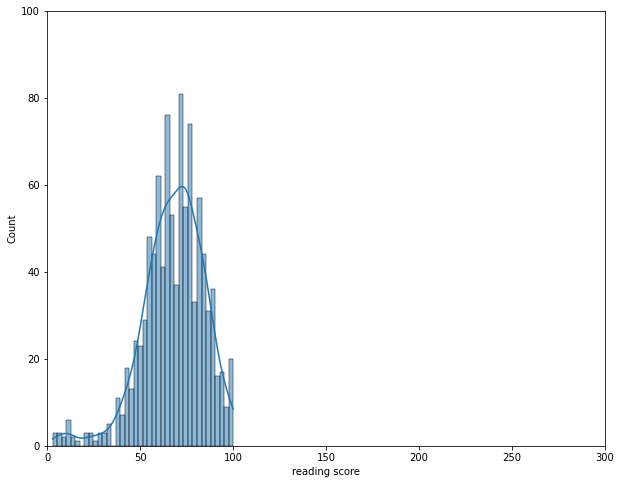

In [34]:
plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.xlim(0,300)
sns.histplot(df['reading score'],bins = 40,kde=True)

<AxesSubplot:xlabel='writing score', ylabel='Count'>

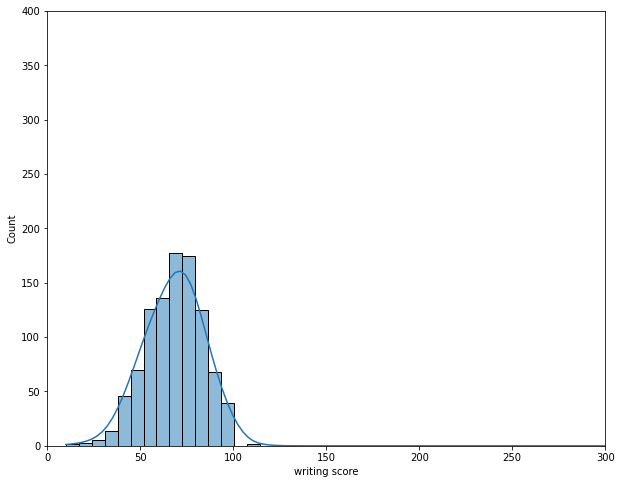

In [35]:
plt.figure(figsize=(10,8))
plt.ylim(0,400)
plt.xlim(0,300)
sns.histplot(df['writing score'],bins = 80,kde=True)

# transform the categorecal data 

In [36]:
# one hot encoding for list of columns
dummies_df = pd.get_dummies(data=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']])

In [37]:
dummies_df.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


<AxesSubplot:ylabel='Count'>

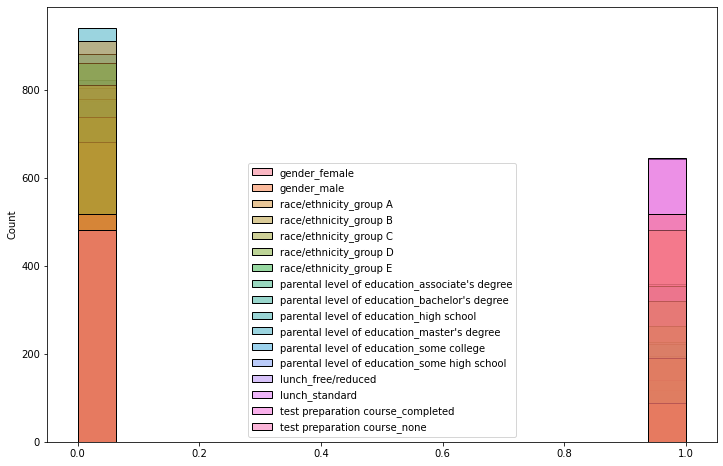

In [38]:
plt.figure(figsize=(12,8))

sns.histplot(dummies_df)

<AxesSubplot:>

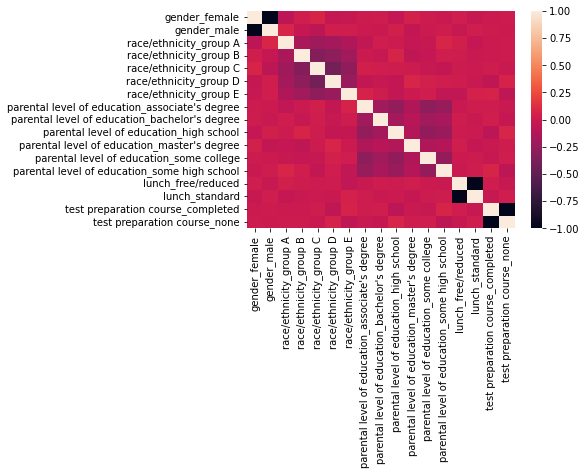

In [39]:
sns.heatmap(dummies_df.corr())

In [40]:
dummies_df.drop(columns = ['gender_male','lunch_standard','test preparation course_none'],inplace=True)

we have removed the features which were co related previously to another features

<AxesSubplot:>

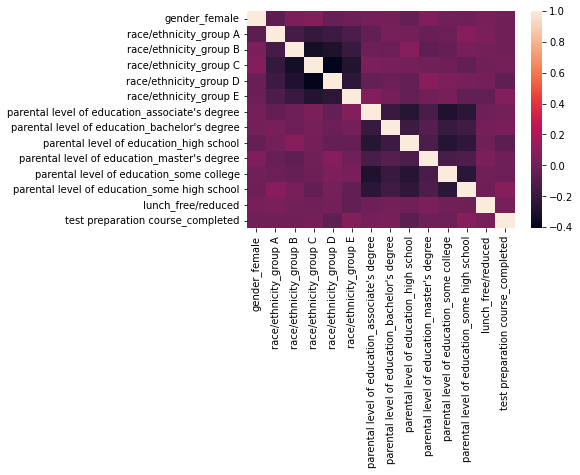

In [41]:
sns.heatmap(dummies_df.corr())

# lets remove outliers in int columns

In [42]:
score_df = df[['math score','reading score','writing score']]
score_df.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


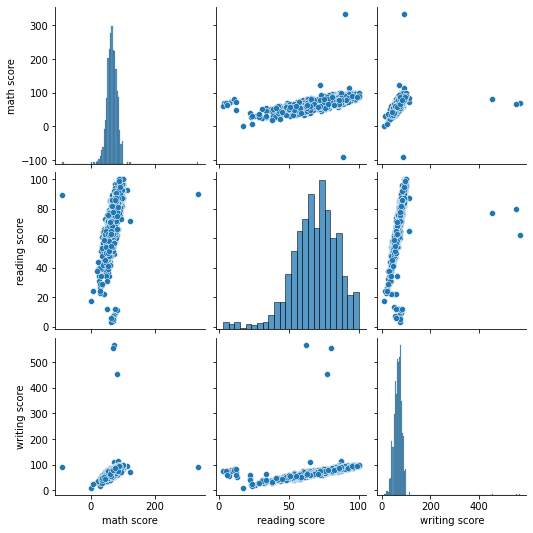

In [43]:
sns.pairplot(score_df)

In [44]:
score_df['math score'].describe()

count    957.000000
mean      66.323929
std       18.280119
min      -89.000000
25%       57.000000
50%       66.000000
75%       77.000000
max      334.000000
Name: math score, dtype: float64

now remove the outliers using interquartile range

In [45]:
score_df.isnull().sum()

math score       43
reading score     6
writing score     9
dtype: int64

In [46]:
score_df.fillna(score_df.mean(),inplace=True)

C:\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [47]:
# remove outlier using interquartile range

def inter_quartile_range(col , df):
    data = df[col]
    sort_data = np.sort(data)
    Q1 = np.percentile(data, 25 , interpolation = 'midpoint')
    Q2 = np.percentile(data, 50 , interpolation = 'midpoint')
    Q3 = np.percentile(data, 75 , interpolation = 'midpoint')

    print('Q1 25 percentile of the given data is, ', Q1)
    print('Q2 50 percentile of the given data is, ', Q2)
    print('Q3 75 percentile of the given data is, ', Q3)

    IQR = Q3 - Q1
    print('Interquartile range is', IQR)

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('low_limit is', low_lim)
    print('up_limit is', up_lim)
    print('\n')

    # drop outlier rows from score df using low_lim and up_lim
    score_df = df[(df[col] > low_lim) & (df[col] < up_lim)]
    return  score_df



In [48]:
for i in score_df.columns:
    score_df = inter_quartile_range( col = i , df = score_df)

Q1 25 percentile of the given data is,  57.0
Q2 50 percentile of the given data is,  66.3239289446186
Q3 75 percentile of the given data is,  76.0
Interquartile range is 19.0
low_limit is 28.5
up_limit is 104.5


Q1 25 percentile of the given data is,  59.0
Q2 50 percentile of the given data is,  69.5
Q3 75 percentile of the given data is,  79.0
Interquartile range is 20.0
low_limit is 29.0
up_limit is 109.0


Q1 25 percentile of the given data is,  58.0
Q2 50 percentile of the given data is,  69.24369323915238
Q3 75 percentile of the given data is,  79.0
Interquartile range is 21.0
low_limit is 26.5
up_limit is 110.5




In [49]:
score_df.isnull().sum()

math score       0
reading score    0
writing score    0
dtype: int64

In [50]:
score_df.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


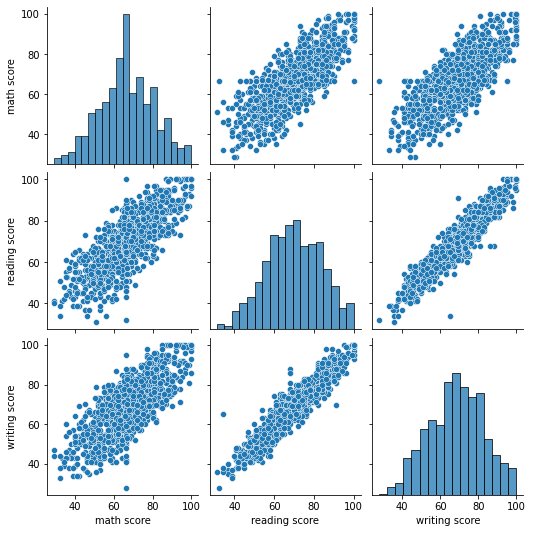

In [51]:
sns.pairplot(score_df)

In [52]:
score_df = score_df.reset_index()

<AxesSubplot:xlabel='index', ylabel='math score'>

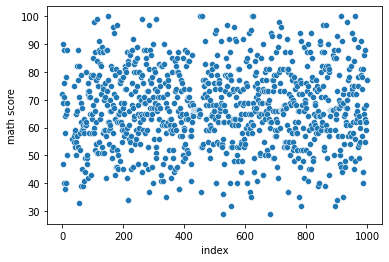

In [53]:
sns.scatterplot(x='index',y='math score',data=score_df)

<AxesSubplot:xlabel='index', ylabel='reading score'>

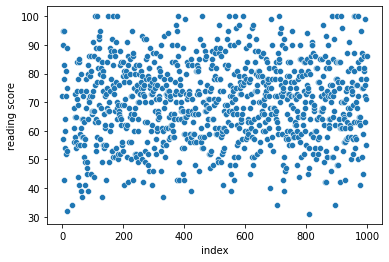

In [54]:
sns.scatterplot(x= 'index' , y='reading score',data=score_df)

<AxesSubplot:xlabel='index', ylabel='writing score'>

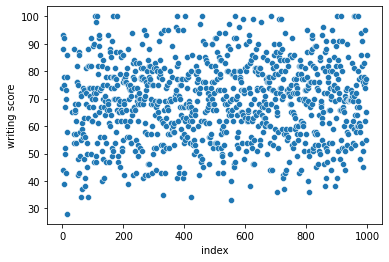

In [55]:

sns.scatterplot(x= 'index' , y='writing score',data=score_df)

## join the two dfs

In [56]:
score_df = score_df.drop(columns = ['index'])
score_df

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
952,88.0,99.0,95.0
953,62.0,55.0,55.0
954,59.0,71.0,65.0
955,68.0,78.0,77.0


In [57]:
dummies_df

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,1,0,0,0,1,0,0,0,1
996,0,0,0,1,0,0,0,0,1,0,0,0,1,0
997,1,0,0,1,0,0,0,0,1,0,0,0,1,1
998,1,0,0,0,1,0,0,0,0,0,1,0,0,1


In [58]:
mg = score_df.join(dummies_df)

In [59]:
mg.shape

(957, 17)

In [60]:
mg

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
0,72.0,72.0,74.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,69.0,90.0,88.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,90.0,95.0,93.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,47.0,57.0,44.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,76.0,78.0,75.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,88.0,99.0,95.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
953,62.0,55.0,55.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
954,59.0,71.0,65.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
955,68.0,78.0,77.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


C:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 720x720 with 0 Axes>

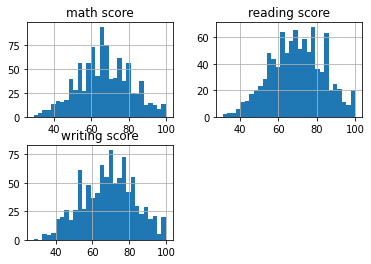

In [61]:
plt.figure(figsize=(10,10))
score_df.hist(bins=30)

In [62]:
def norm1(mg,col):
    return ( mg[col] - mg[col].mean() ) / mg[col].std()

normalized_df = mg.copy()
for i in normalized_df.columns:
    normalized_df[i] = norm1(normalized_df,i)

In [63]:
normalized_df.head()

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
0,-28.57,-30.59,-27.54,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-28.60,-30.41,-27.40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-28.39,-30.36,-27.35,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-28.82,-30.74,-27.84,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-28.53,-30.53,-27.53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


C:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 720x720 with 0 Axes>

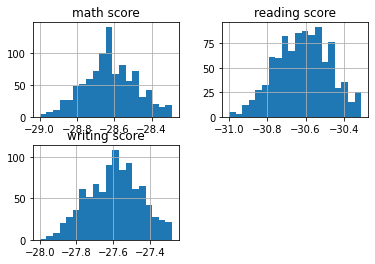

In [64]:
plt.figure(figsize=(10,10))
normalized_df.iloc[:,:3].hist(bins=20)

# new dataset

In [65]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
df.shape

(205, 26)

In [68]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [87]:
dt = dict(df.dtypes)
int_cols = [i for i in df.columns if dt[i] != "O"]
int_df =  df[int_cols]

In [88]:
int_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


C:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

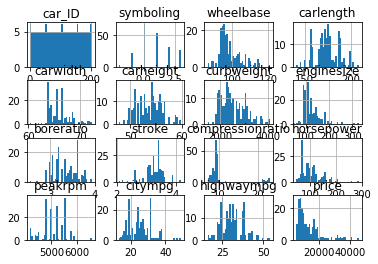

In [89]:
int_df.hist(bins = 40)

<AxesSubplot:>

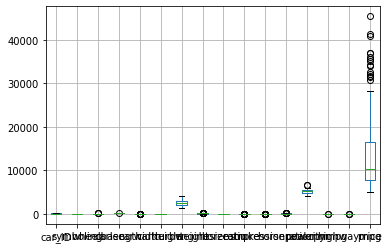

In [90]:
df.boxplot()

In [92]:
int_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='car_ID', ylabel='citympg'>

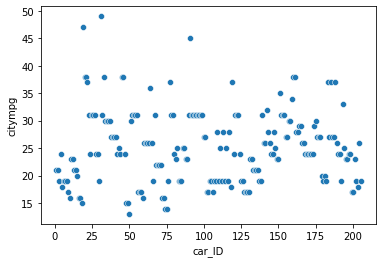

In [105]:
sns.scatterplot(x= 'car_ID',y= 'citympg',data = int_df)

<AxesSubplot:>

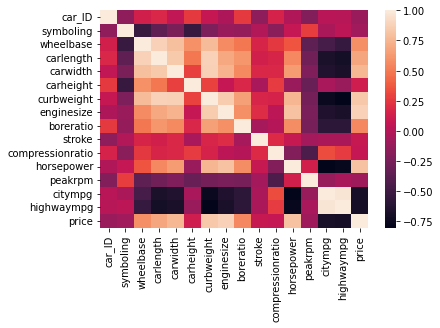

In [97]:
sns.heatmap(int_df.corr())